## Import Libraries 

In [1]:
#Import the Libraries
# Model--> Predict the profit of the company.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visual representation of label 

###### This is what i think the cols represent here

**Columns deatils:**

R&D Spend: This column represents the amount of money the company spends on research and development activities.

Administration: This column represents the amount of money the company spends on administrative activities.

Marketing Spend: This column represents the amount of money the company invests in marketing efforts.

State: This column represents the state where each company is located.

Profit: This column represents the profit achieved by each company.

In [2]:
#Load the data set and Extracting the independent and dependent data set
companies=pd.read_csv("company.csv")
# print(companies.head())
x=companies.iloc[:,:-1].values  # iloc[:(rows),:-1(columns)(exculde:profilt column)].values mean stored the values in x.
y=companies.iloc[:,-1].values  # iloc[:(rows),-1(index)(profit)].values mean stored the values in y.
companies.head()
# companies.info()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [4]:
companies.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

# Visualise Data

In [5]:
num_cols =[ var for var in companies.columns if companies[var].dtype != "O"]
num_cols 

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

<Axes: >

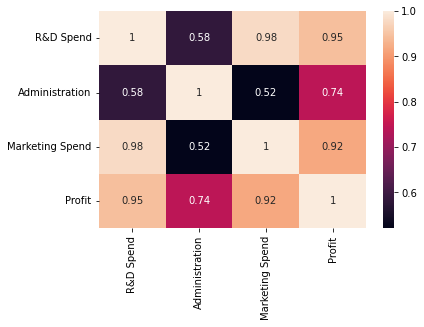

In [6]:
#Data Visualization 
#Building the correlation(corr) matrix

sns.heatmap(companies[num_cols].corr(), annot=True)

# PCA = principle component analysis


There's a very strong positive correlation between R&D spending and marketing spending, R&D spending and profit.

This suggests that companies that invest more in research and development also tend to allocate a higher budget for marketing activities and companies that spend more on research and development tend to have higher profits. 

There's a strong positive correlation between administrative expenses and profit. This means that companies with higher administrative costs tend to achieve higher profits.

While for others the relationship is not extremely strong.

for instance, There's a moderate positive correlation between administrative expenses and marketing spending. This suggests that companies that spend more on administration also tend to invest more in marketing, but the correlation is not as strong as with other factors.

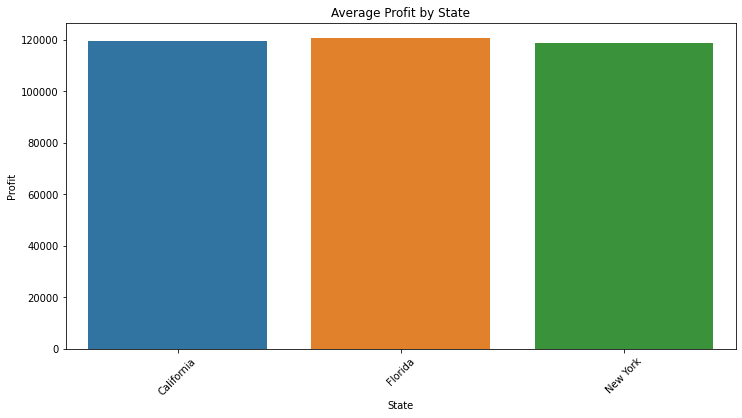

In [7]:
# let's see state vs profit graph
# it does not explain much

# Group by state and calculate the mean profit for each state
avg_profit_by_state = companies.groupby('State')['Profit'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Profit', data=avg_profit_by_state)
plt.xticks(rotation=45)
plt.title('Average Profit by State')
plt.show()


In [8]:
# As we can see the profit is quite close from each state so, not be sufficient to draw concrete conclusions about the impact of state on profit

avg_profit_by_state 

,State,Profit
0,California,119366.449481
1,Florida,120556.909766
2,New York,118756.829609


In [9]:
avg_ad_by_state = companies.groupby("State")[["Marketing Spend", "R&D Spend"]].mean().reset_index()
avg_ad_by_state

,State,Marketing Spend,R&D Spend
0,California,223944.253456,80804.369651
1,Florida,231368.018870,83677.876584
2,New York,223556.087288,80622.598144


In [10]:
companies["State"]

0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object

In [11]:
#Encoding Categorical Data as in X column 3 is a categorical data so we have to convert it into numeric data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder() # Object of labelencoder 


# label encoder converts alphabetical value into numerical value.

# companies["State"]=labelencoder.fit_transform(companies["State"])
# print(companies["State"])


# One-Hot Encoding is a technique used in data preprocessing, particularly when dealing with categorical variables. 
# It's like turning categories into numbers that a machine learning algorithm can understand.
onehotencoder=OneHotEncoder()
ohe=onehotencoder.fit_transform(companies[["State"]]) 
ohe_comp = ohe.toarray() 

In [12]:
companies["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [13]:
comp_data = pd.DataFrame(ohe_comp, columns=['New York', 'California', 'Florida'])
comp_data.astype("int64")

,New York,California,Florida
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [14]:
cols = [companies, comp_data]
companies_data = pd.concat(cols, axis = 1)

In [15]:
companies_data.drop("State", axis = 1, inplace = True)

In [16]:
companies_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


In [17]:
companies_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit', 'New York',
       'California', 'Florida'],
      dtype='object')

In [18]:
x = companies_data.drop("Profit", axis = 1)
y = companies_data["Profit"]
x.shape, y.shape

((1000, 6), (1000,))

In [19]:
#Spliting the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train_data = sc.fit_transform(x_train)
sc_test_data = sc.fit(x_test)

In [21]:
#Fitting Linera Regression model to Training Set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
#Predicting the test set Result
y_pred=reg.predict(x_test)

In [23]:
#Calculating Intercept
print(reg.intercept_)

-51561.46494777108


In [24]:
#Calculating Coefficient
print(reg.coef_)
a = reg.coef_
print("Shape of coefficient:",a.shape)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]
Shape of coefficient: (6,)


Text(0, 0.5, 'Predicted value')

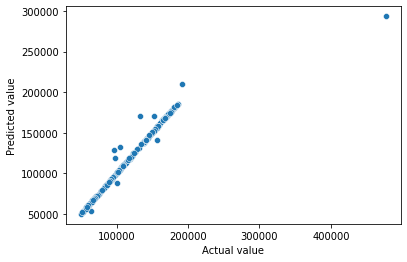

In [25]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, recall_score
print("R2 score:",r2_score(y_test,y_pred)) 
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))

R2 score: 0.9112695892268794
Mean Squared Error: 192148061.81508136
Mean Absolute Error: 2300.22175098334


The R2 score, yielded a high value of 0.9113. This indicates that approximately 91.13% of the variance in the dependent variable could be explained by the model's predictions
